In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('DDoS_Attack_Detection_Classification.csv')
df

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


In [3]:
src = df[df['label'] == 1]['src'].unique().tolist()
print('malicious ip (src) :',src)
print('No. of malicious : ',len(src))

malicious ip (src) : ['10.0.0.1', '10.0.0.2', '10.0.0.10', '10.0.0.4', '10.0.0.3', '10.0.0.13', '10.0.0.5', '10.0.0.20', '10.0.0.11', '10.0.0.18', '10.0.0.12', '10.0.0.9', '10.0.0.7', '10.0.0.6', '10.0.0.14', '10.0.0.15', '10.0.0.8', '10.0.0.16', '10.0.0.17']
No. of malicious :  19


In [4]:
dst = df[df['label'] == 1]['dst'].unique().tolist()
print('malicious ip (dst) :',dst)
print('No. of malicious : ',len(dst))

malicious ip (dst) : ['10.0.0.8', '10.0.0.7', '10.0.0.3', '10.0.0.5', '10.0.0.10', '10.0.0.13', '10.0.0.4', '10.0.0.1', '10.0.0.11', '10.0.0.2', '10.0.0.9', '10.0.0.6', '10.0.0.14', '10.0.0.15', '10.0.0.12', '10.0.0.16', '10.0.0.17']
No. of malicious :  17


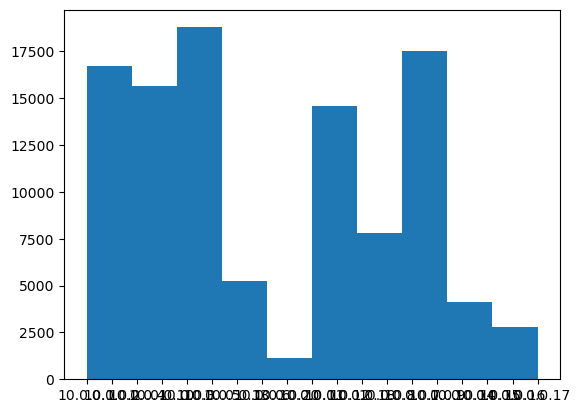

In [5]:
plt.hist(df['src'])
plt.show()

In [6]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['src']= label_encoder.fit_transform(df['src'])
df['dst']= label_encoder.fit_transform(df['dst'])
df['Protocol']= label_encoder.fit_transform(df['Protocol'])

In [7]:
df

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,0,16,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,2,3,143928631,3917,0,0.0,0.0,0
1,11605,1,0,16,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,2,4,3842,3520,0,0.0,0.0,0
2,11425,1,10,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,1,3795,1242,0,0.0,0.0,0
3,11425,1,10,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,2,3688,1492,0,0.0,0.0,0
4,11425,1,10,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,14,15,79,7742,81,842000000,8.184200e+10,5,...,0,0,0,1,15209,12720,1,1.0,2.0,0
104341,5262,3,14,15,79,7742,81,842000000,8.184200e+10,5,...,0,0,0,3,15099,14693,1,1.0,2.0,0
104342,5262,3,2,13,31,3038,31,805000000,3.180500e+10,5,...,1,0,0,2,3409,3731,0,0.0,0.0,0
104343,5262,3,2,13,31,3038,31,805000000,3.180500e+10,5,...,1,0,0,1,15209,12720,1,1.0,2.0,0


In [8]:
sum(df[df['label'] == 1].groupby('src')['pktcount'].sum().tolist())

3220385142

In [9]:
df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  int32  
 3   dst          104345 non-null  int32  
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  int32  
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [11]:
df.dropna(inplace = True)

In [12]:
X = df.drop('label',axis = 1)
X = (X-X.mean())/X.std()
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [13]:


knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

ypred = knn_clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)

print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:')
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Confusion Matrix:
[[12372   241]
 [  242  7913]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12613
           1       0.97      0.97      0.97      8155

    accuracy                           0.98     20768
   macro avg       0.98      0.98      0.98     20768
weighted avg       0.98      0.98      0.98     20768

Accuracy: 0.9767430662557781


In [14]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=42)  
classifier.fit(X_train, y_train)  
y_pred= classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, y_pred)
print('Classification Report:')
print (result1)
result2 = accuracy_score(y_test,y_pred)
print('Accuracy:',result2)

Confusion Matrix:
[[12613     0]
 [    0  8155]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12613
           1       1.00      1.00      1.00      8155

    accuracy                           1.00     20768
   macro avg       1.00      1.00      1.00     20768
weighted avg       1.00      1.00      1.00     20768

Accuracy: 1.0


In [15]:
# from sklearn import linear_model
# regr = linear_model.LinearRegression()
# regr.fit(X_train, y_train)
# y_pred= regr.predict(X_test)
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# result = confusion_matrix(y_train, y_pred)

# print('Confusion Matrix:')
# print(result)
# result1 = classification_report(y_train, y_pred)
# print('Classification Report:')
# print (result1)
# result2 = accuracy_score(y_train,y_pred)
# print('Accuracy:',result2)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, y_pred)
print('Classification Report:')
print (result1)
result2 = accuracy_score(y_test,y_pred)
print('Accuracy:',result2)

Confusion Matrix:
[[10529  2084]
 [ 2774  5381]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81     12613
           1       0.72      0.66      0.69      8155

    accuracy                           0.77     20768
   macro avg       0.76      0.75      0.75     20768
weighted avg       0.76      0.77      0.76     20768

Accuracy: 0.7660824345146379
